## <h1>Project Name - AirBnb Hotel Bookings Analysis</h1>


📌 Project Summary:

The project “Netflix Dataset Analysis – Content Trends for Strategic Recommendations” focuses on exploring Netflix’s content catalog to identify key trends and patterns. Using a dataset of 7,789 records with 11 attributes such as title, genre, country, release year, duration, and rating, this project aims to analyze how Netflix’s content has evolved between 2008 and 2021. The analysis emphasizes the distribution of Movies vs. TV Shows, genre popularity, and country-wise contributions. Insights will be presented through data visualizations and dashboards to support data-driven decision-making.

📌 Problem Statement:

With increasing competition from streaming platforms like Amazon Prime and Disney+, Netflix must strategically manage its content library to attract and retain viewers worldwide. The key problem is to analyze content distribution trends over the years to identify strengths, gaps, and opportunities. This includes understanding the balance between Movies and TV Shows, tracking popular and emerging genres, and examining global content representation. These insights can help guide future content acquisition and production strategies.

📌 Business Context:

In the competitive OTT industry, content strategy plays a critical role in user engagement and market expansion. By analyzing genre performance, country contributions, and content trends, Netflix can make informed business decisions to strengthen its global presence. Identifying popular genres, underrepresented regions, and shifting audience preferences allows the platform to plan investments more effectively. This ensures Netflix remains competitive, enhances viewer satisfaction, and continues to grow its subscriber base worldwide.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style="whitegrid")  # optional styling



In [25]:
from google.colab import files
uploaded = files.upload()

Saving Netflix Dataset.csv to Netflix Dataset (1).csv


In [26]:
df = pd.read_csv('Netflix Dataset.csv')

# Quick look
print("Rows,Cols:", df.shape)
display(df.head())
display(df.info())
print(df.shape)


Rows,Cols: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


None

(7789, 11)


In [27]:
# 2. Handle Missing Values
print("\nMissing values before cleaning:\n")
print(df.isnull().sum())




Missing values before cleaning:

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [28]:
# Missing data count
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

# Percentage missing
missing_pct = (missing / len(df)) * 100
print("Percentage missing:\n", missing_pct)


Missing values per column:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64
Percentage missing:
 Show_Id          0.000000
Category         0.000000
Title            0.000000
Director        30.658621
Cast             9.218128
Country          6.509180
Release_Date     0.128386
Rating           0.089870
Duration         0.000000
Type             0.000000
Description      0.000000
dtype: float64


In [29]:
# Fill NaNs in important columns with placeholders
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Unknown')
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [30]:
# 3. Extract Year from Release_Date
df['Year'] = df['Release_Date'].dt.year

# 4. Clean Category (Movie or TV Show)
df['Category'] = df['Category'].str.strip()

# 5. Genre handling (Type column)
df['Type'] = df['Type'].fillna('Unknown')
df['Genre_List'] = df['Type'].str.split(',\s*')
df_genre = df.explode('Genre_List').rename(columns={'Genre_List':'Genre'})
df_genre['Genre'] = df_genre['Genre'].str.strip()

<>:9: SyntaxWarning:

invalid escape sequence '\s'

<>:9: SyntaxWarning:

invalid escape sequence '\s'

/tmp/ipython-input-4075521030.py:9: SyntaxWarning:

invalid escape sequence '\s'



In [31]:
# Genre explosion
df['Genre_List'] = df['Type'].str.split(',\s*')
df_genre = df.explode('Genre_List').rename(columns={'Genre_List':'Genre'})

# Country explosion
df['Country_List'] = df['Country'].str.split(',\s*')
df_country = df.explode('Country_List').rename(columns={'Country_List':'Country_Single'})


<>:2: SyntaxWarning:

invalid escape sequence '\s'

<>:6: SyntaxWarning:

invalid escape sequence '\s'

<>:2: SyntaxWarning:

invalid escape sequence '\s'

<>:6: SyntaxWarning:

invalid escape sequence '\s'

/tmp/ipython-input-3172702121.py:2: SyntaxWarning:

invalid escape sequence '\s'

/tmp/ipython-input-3172702121.py:6: SyntaxWarning:

invalid escape sequence '\s'



<Axes: title={'center': 'Movies vs TV Shows Over Years'}, xlabel='Year'>

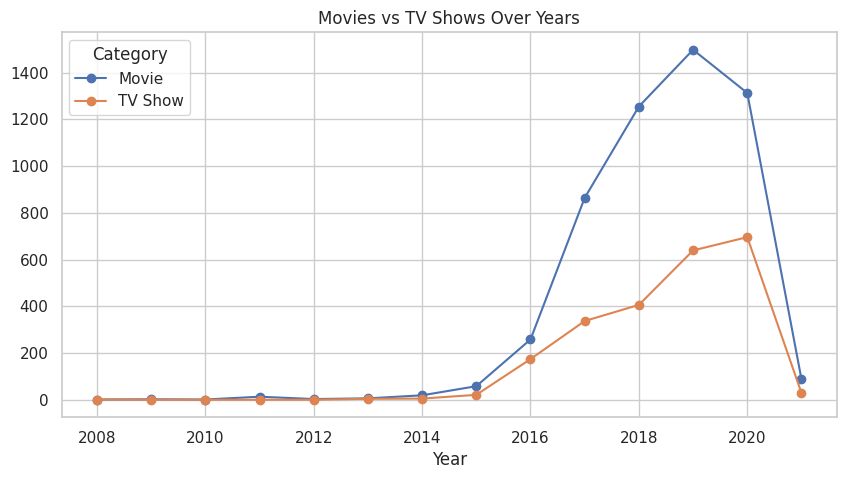

In [32]:
year_category = df.groupby(['Year','Category']).size().unstack(fill_value=0)
year_category.plot(kind='line', figsize=(10,5), marker='o', title='Movies vs TV Shows Over Years')


<>:2: SyntaxWarning:

invalid escape sequence '\s'

<>:2: SyntaxWarning:

invalid escape sequence '\s'

/tmp/ipython-input-533192916.py:2: SyntaxWarning:

invalid escape sequence '\s'



<Figure size 1000x500 with 0 Axes>

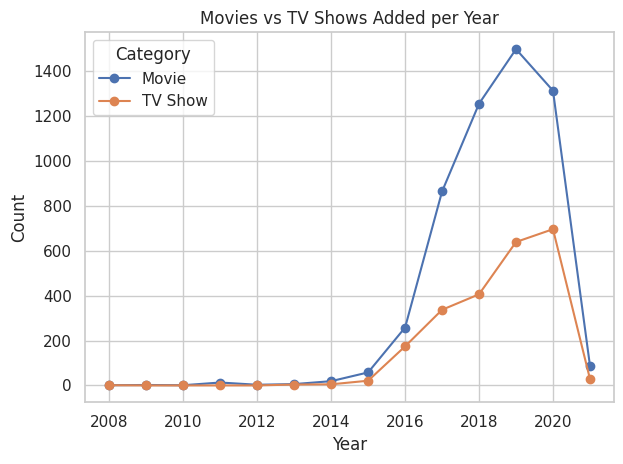

In [33]:
# 6. Country handling (split multiple countries)
df['Country_List'] = df['Country'].str.split(',\s*')
df_country = df.explode('Country_List').rename(columns={'Country_List':'Country_Single'})
df_country['Country_Single'] = df_country['Country_Single'].str.strip()

# 7. Movies vs TV Shows over years
year_category = df.groupby(['Year','Category']).size().unstack(fill_value=0)
plt.figure(figsize=(10,5))
year_category.plot(marker='o')
plt.title('Movies vs TV Shows Added per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


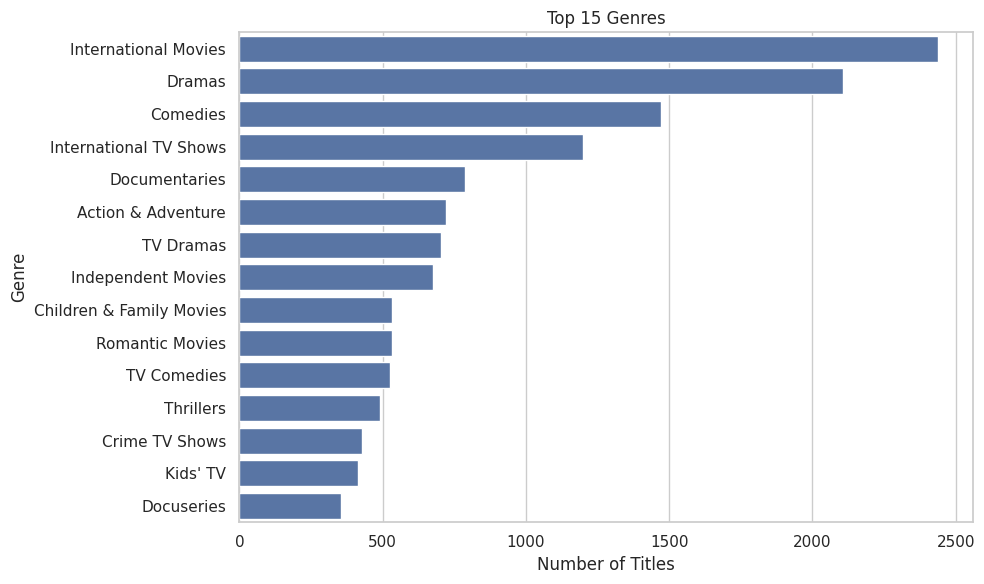

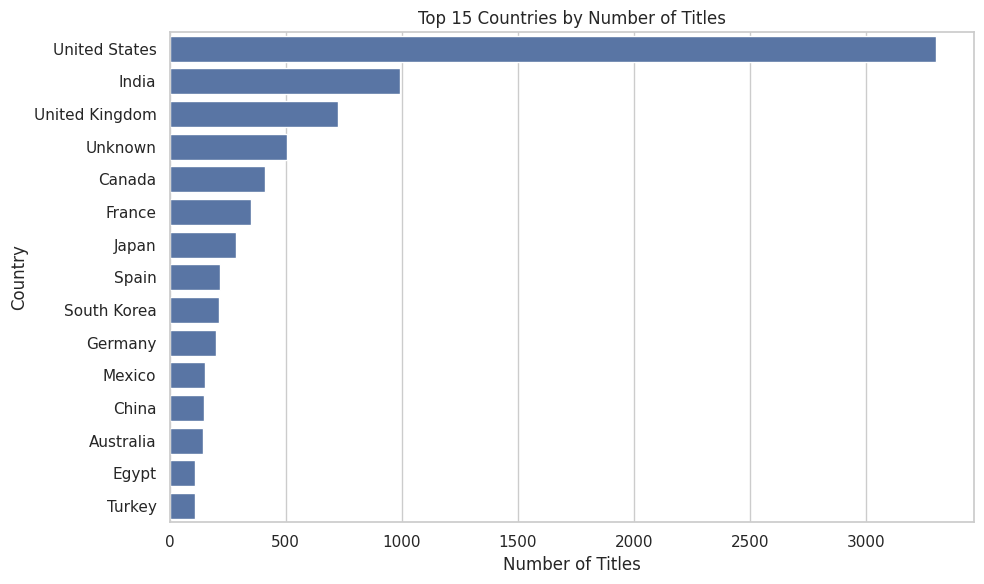

In [34]:
# Interactive Plot
fig = px.line(year_category.reset_index(), x='Year', y=['Movie','TV Show'],
              labels={'value':'Count','Year':'Year'}, title='Movies vs TV Shows Trend')
fig.show()

# 8. Top Genres
top_genres = df_genre['Genre'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title('Top 15 Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# 9. Top Countries
top_countries = df_country['Country_Single'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 15 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


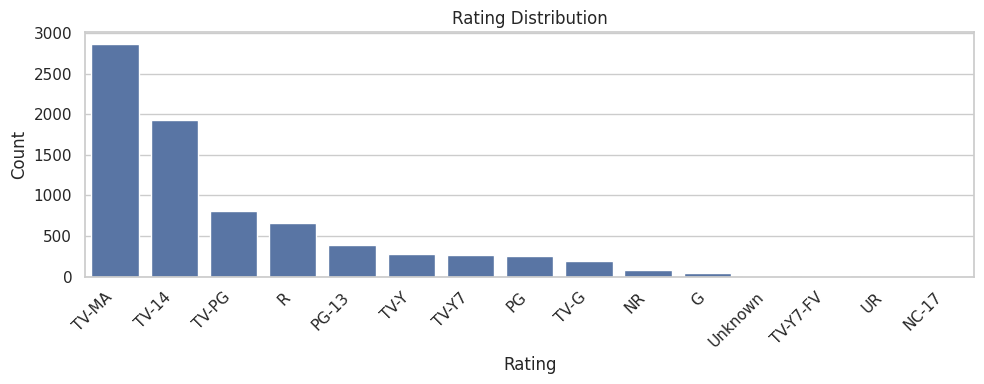

In [35]:
# 10. Rating distribution
rating_counts = df['Rating'].value_counts().head(20)
plt.figure(figsize=(10,4))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



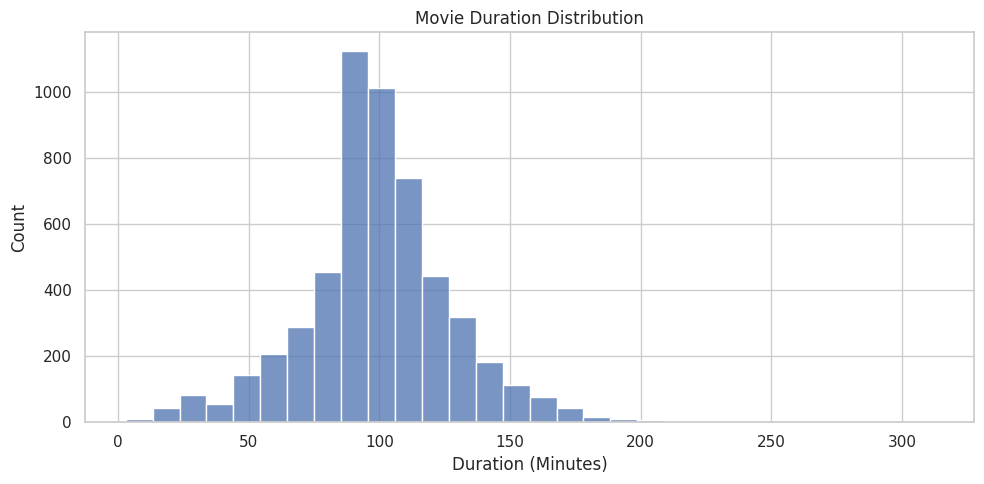

In [36]:

# 11. Duration analysis
df['Duration_Num'] = df['Duration'].str.extract(r'(\d+)').astype(float)
df['Duration_Unit'] = df['Duration'].str.extract(r'([A-Za-z]+)$')

plt.figure(figsize=(10,5))
sns.histplot(df[df['Category']=='Movie']['Duration_Num'].dropna(), bins=30)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

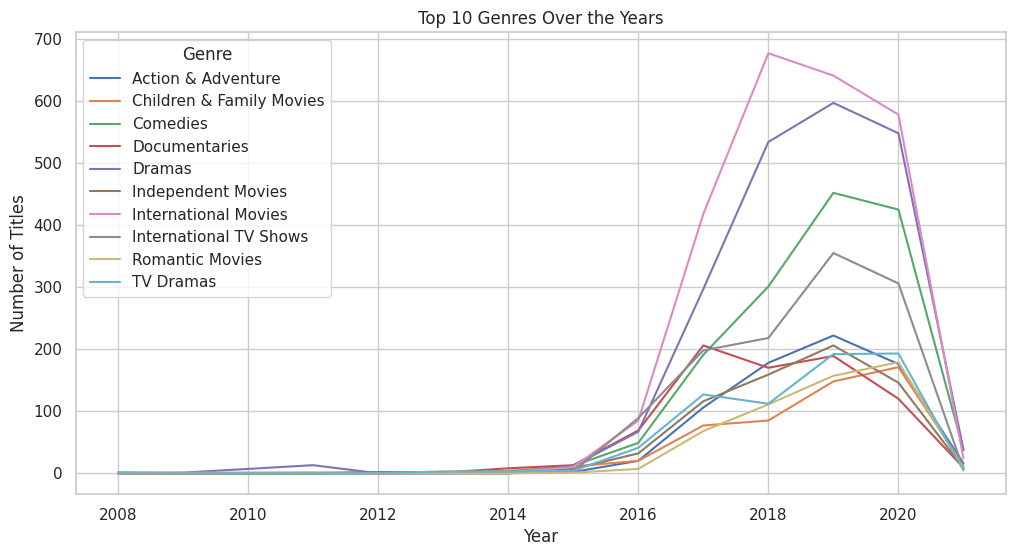

In [37]:
top_genres = df_genre['Genre'].value_counts().head(10).index
genre_year = df_genre[df_genre['Genre'].isin(top_genres)].groupby(['Year','Genre']).size().unstack(fill_value=0)

# Plot trend
genre_year.plot(figsize=(12,6))
plt.title('Top 10 Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


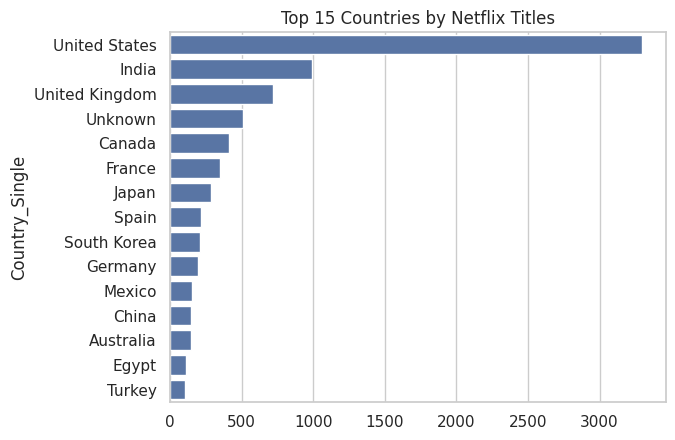

In [38]:
top_countries = df_country['Country_Single'].value_counts().head(15)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 15 Countries by Netflix Titles')
plt.show()


In [39]:
# Example if 'Category' has 'Netflix Original'
originals = df[df['Category'].str.contains('Netflix Original', na=False)]
print("Originals count:", len(originals))


Originals count: 0


In [40]:
# 12. Save cleaned data
df.to_csv('netflix_cleaned.csv', index=False)
df_genre.to_csv('netflix_genre_exploded.csv', index=False)
df_country.to_csv('netflix_country_exploded.csv', index=False)

print("✅ Cleaning & EDA Completed — Files saved:")
print("- netflix_cleaned.csv")
print("- netflix_genre_exploded.csv")
print("- netflix_country_exploded.csv")

✅ Cleaning & EDA Completed — Files saved:
- netflix_cleaned.csv
- netflix_genre_exploded.csv
- netflix_country_exploded.csv
